In [1]:
import psycopg2 as pg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-dark')

## Colect Data with language SQL - PastgresSQL

In [2]:
# Database: Postgress 12.0 - AWS
# credenciais
host = 'comunidade-ds-postgres.c50pcakiuwi3.us-east-1.rds.amazonaws.com'
port = 5432
database = 'comunidadedsdb'
username = 'member'
password = 'cdspa'

In [3]:
# conectando ao DB
conn = pg.connect( user = username,
                   password = password,
                   host = host,
                   port = port,
                   database = database)

cursor = conn.cursor()


In [4]:
query_tables = """
    SELECT *
    FROM pa004.users u LEFT JOIN pa004.vehicle v ON (u.id = v.id)
                       LEFT JOIN pa004.insurance i ON (u.id = i.id)
"""

cursor.execute(query_tables)

df_raw = pd.read_sql(query_tables, conn) # não precisa de cursor, faz a conexão direto
df_raw = df_raw.loc[:, ~df_raw.columns.duplicated()]
df_raw.head()

/tmp/ipykernel_4903/1677877073.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_raw = pd.read_sql(query_tables, conn) # não precisa de cursor, faz a conexão direto


,id,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage,previously_insured,annual_premium,vintage,response
0,7,Male,23,11.0,152.0,1,< 1 Year,Yes,0,23367.0,249,0
1,13,Female,41,15.0,14.0,1,1-2 Year,No,1,31409.0,221,0
2,18,Female,25,35.0,152.0,1,< 1 Year,No,1,46622.0,299,0
3,31,Female,26,8.0,160.0,1,< 1 Year,No,0,2630.0,136,0
4,39,Male,45,8.0,124.0,1,1-2 Year,Yes,0,42297.0,264,0


## Descriptive Analysis

In [5]:
df1 = df_raw.copy()

In [6]:
df1.columns

Index(['id', 'gender', 'age', 'region_code', 'policy_sales_channel',
       'driving_license', 'vehicle_age', 'vehicle_damage',
       'previously_insured', 'annual_premium', 'vintage', 'response'],
      dtype='object')

**Descrição das colunas**

colunas | descrição
------ | -------
id | identificador único
gender | gênero do cliente
age | idade do cliente
driving license | 0: não permissão digirir, 1: permissão digirir
region code | código da região do cliente
Previously Insured | 0: não possui seguro automovel, 1: já possui seguro automovel
vehicle age | idade do veículo
vehicle damage | 0: nunca foi danificado, 1: já foi danificado no passado
anual premium | quantidade que irá pagar pelo seguro de automovel anual
policy sales channel | código anônimo do contato do cliente 
vintage | nº dias que o cliente associou à empresa
response | 0: não tem interesse ao seguro de automovel, 1: tem interesse ao seguro de automovel


In [7]:
## shape
print(f'Number of rows: {df1.shape[0]}')
print(f'Number of columns: {df1.shape[1]}')

Number of rows: 381109
Number of columns: 12


In [8]:
## info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   gender                381109 non-null  object 
 2   age                   381109 non-null  int64  
 3   region_code           381109 non-null  float64
 4   policy_sales_channel  381109 non-null  float64
 5   driving_license       381109 non-null  int64  
 6   vehicle_age           381109 non-null  object 
 7   vehicle_damage        381109 non-null  object 
 8   previously_insured    381109 non-null  int64  
 9   annual_premium        381109 non-null  float64
 10  vintage               381109 non-null  int64  
 11  response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [9]:
## Check NA
df1.isna().sum()

id                      0
gender                  0
age                     0
region_code             0
policy_sales_channel    0
driving_license         0
vehicle_age             0
vehicle_damage          0
previously_insured      0
annual_premium          0
vintage                 0
response                0
dtype: int64

In [10]:
## duplicate
df1[df1.duplicated()] # não há linhas duplicadas

,id,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage,previously_insured,annual_premium,vintage,response


In [11]:
## describe
df1.describe()

,id,age,region_code,policy_sales_channel,driving_license,previously_insured,annual_premium,vintage,response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,26.388807,112.034295,0.997869,0.458210,30564.389581,154.347397,0.122563
std,110016.836208,15.511611,13.229888,54.203995,0.046110,0.498251,17213.155057,83.671304,0.327936
min,1.000000,20.000000,0.000000,1.000000,0.000000,0.000000,2630.000000,10.000000,0.000000
25%,95278.000000,25.000000,15.000000,29.000000,1.000000,0.000000,24405.000000,82.000000,0.000000
50%,190555.000000,36.000000,28.000000,133.000000,1.000000,0.000000,31669.000000,154.000000,0.000000
75%,285832.000000,49.000000,35.000000,152.000000,1.000000,1.000000,39400.000000,227.000000,0.000000
max,381109.000000,85.000000,52.000000,163.000000,1.000000,1.000000,540165.000000,299.000000,1.000000


In [12]:
## change type
df1['region_code'] = df1['region_code'].astype(int)
df1['policy_sales_channel'] = df1['policy_sales_channel'].astype(int)
df1.dtypes

id                        int64
gender                   object
age                       int64
region_code               int64
policy_sales_channel      int64
driving_license           int64
vehicle_age              object
vehicle_damage           object
previously_insured        int64
annual_premium          float64
vintage                   int64
response                  int64
dtype: object

In [13]:
## estatistic
# numeric
num_attributes = df1.select_dtypes(include=['int64', 'float64'])
num_attributes = num_attributes.drop('id', axis=1)

# central tendency
# mean / median
c1 = pd.DataFrame(num_attributes.apply(np.mean)).T
c2 = pd.DataFrame(num_attributes.apply(np.median)).T

# dispersion tendency
#max / min / range / std / sknew / kurtosi
d1 = pd.DataFrame(num_attributes.apply(np.max)).T
d2 = pd.DataFrame(num_attributes.apply(np.min)).T
d3 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

# concat
df_num = pd.concat([c1,c2,d1,d2,d3,d4,d5]).T.reset_index()
df_num.columns = ['attribute', 'mean', 'median', 'max', 'min', 'range', 'skew', 'kurtosis']
df_num

,attribute,mean,median,max,min,range,skew,kurtosis
0,age,38.822584,36.0,85.0,20.0,65.0,0.672539,-0.565655
1,region_code,26.388807,28.0,52.0,0.0,52.0,-0.115266,-0.867857
2,policy_sales_channel,112.034295,133.0,163.0,1.0,162.0,-0.900008,-0.970810
3,driving_license,0.997869,1.0,1.0,0.0,1.0,-21.595182,464.354302
4,previously_insured,0.458210,0.0,1.0,0.0,1.0,0.167747,-1.971871
5,annual_premium,30564.389581,31669.0,540165.0,2630.0,537535.0,1.766087,34.004569
6,vintage,154.347397,154.0,299.0,10.0,289.0,0.003030,-1.200688
7,response,0.122563,0.0,1.0,0.0,1.0,2.301906,3.298788


**NOTA**:

In [14]:
## estatistic
# categorical
cat_attributes = df1.select_dtypes(exclude= ['int64', 'float64'])
cat_attributes.apply(lambda x: x.unique().shape[0])

gender            2
vehicle_age       3
vehicle_damage    2
dtype: int64

In [15]:
print(cat_attributes['gender'].value_counts())

aux1 = df1[['id', 'response','gender']].groupby(['gender','response']).count().reset_index()
aux1

Male      206089
Female    175020
Name: gender, dtype: int64


,gender,response,id
0,Female,0,156835
1,Female,1,18185
2,Male,0,177564
3,Male,1,28525


In [16]:
print(cat_attributes['vehicle_age'].value_counts())

aux2 = df1[['id', 'response','vehicle_age']].groupby(['vehicle_age','response']).count().reset_index()
aux2

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: vehicle_age, dtype: int64


,vehicle_age,response,id
0,1-2 Year,0,165510
1,1-2 Year,1,34806
2,< 1 Year,0,157584
3,< 1 Year,1,7202
4,> 2 Years,0,11305
5,> 2 Years,1,4702


In [17]:
print(cat_attributes['vehicle_damage'].value_counts())

aux3 = df1[['id', 'response','vehicle_damage']].groupby(['vehicle_damage','response']).count().reset_index()
aux3

Yes    192413
No     188696
Name: vehicle_damage, dtype: int64


,vehicle_damage,response,id
0,No,0,187714
1,No,1,982
2,Yes,0,146685
3,Yes,1,45728


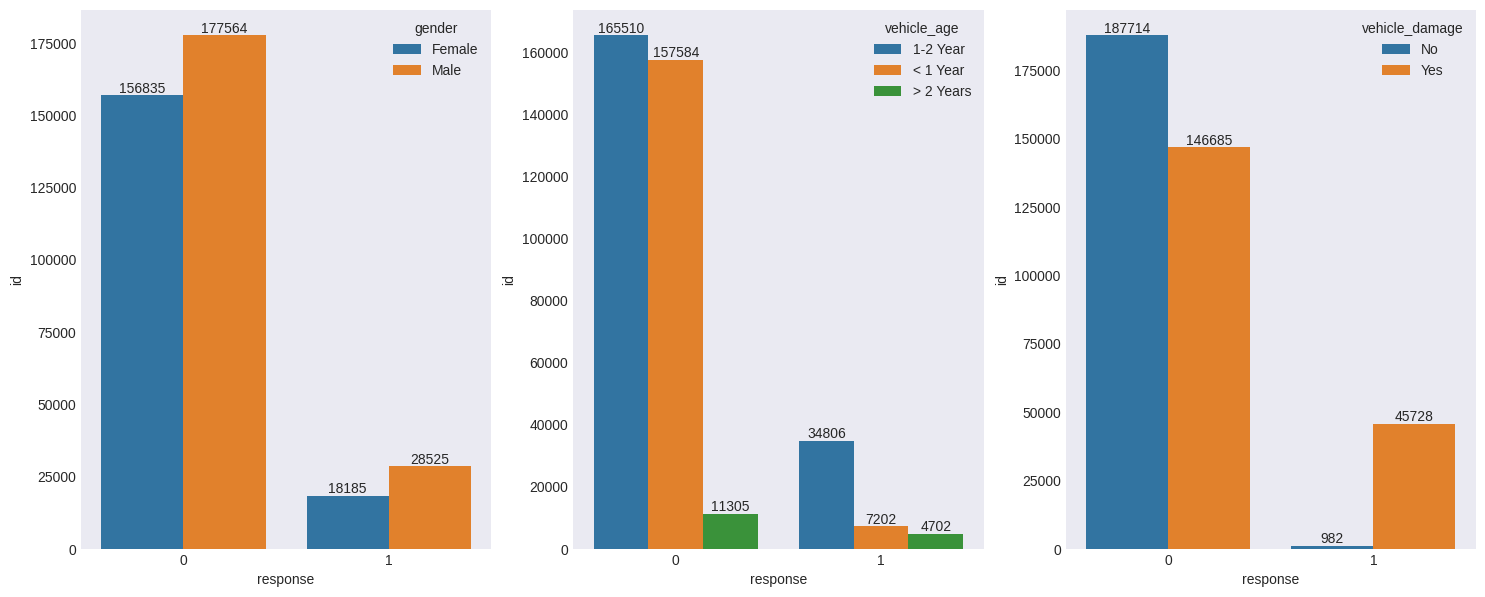

In [18]:
plt.figure(figsize=(18,7))

plt.subplot(1,3,1)
ax = sns.barplot(data=aux1, x='response', y='id', hue='gender')
for container in ax.containers:
    ax.bar_label(container)

plt.subplot(1,3,2)
ax1 = sns.barplot(data=aux2, x='response', y='id', hue='vehicle_age')
for container in ax1.containers:
    ax1.bar_label(container)

plt.subplot(1,3,3)
ax2 = sns.barplot(data=aux3, x='response', y='id', hue='vehicle_damage')
for container in ax2.containers:
    ax2.bar_label(container);

**NOTA:**

**OUTLIERS:**

In [19]:
df1.head()

,id,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage,previously_insured,annual_premium,vintage,response
0,7,Male,23,11,152,1,< 1 Year,Yes,0,23367.0,249,0
1,13,Female,41,15,14,1,1-2 Year,No,1,31409.0,221,0
2,18,Female,25,35,152,1,< 1 Year,No,1,46622.0,299,0
3,31,Female,26,8,160,1,< 1 Year,No,0,2630.0,136,0
4,39,Male,45,8,124,1,1-2 Year,Yes,0,42297.0,264,0


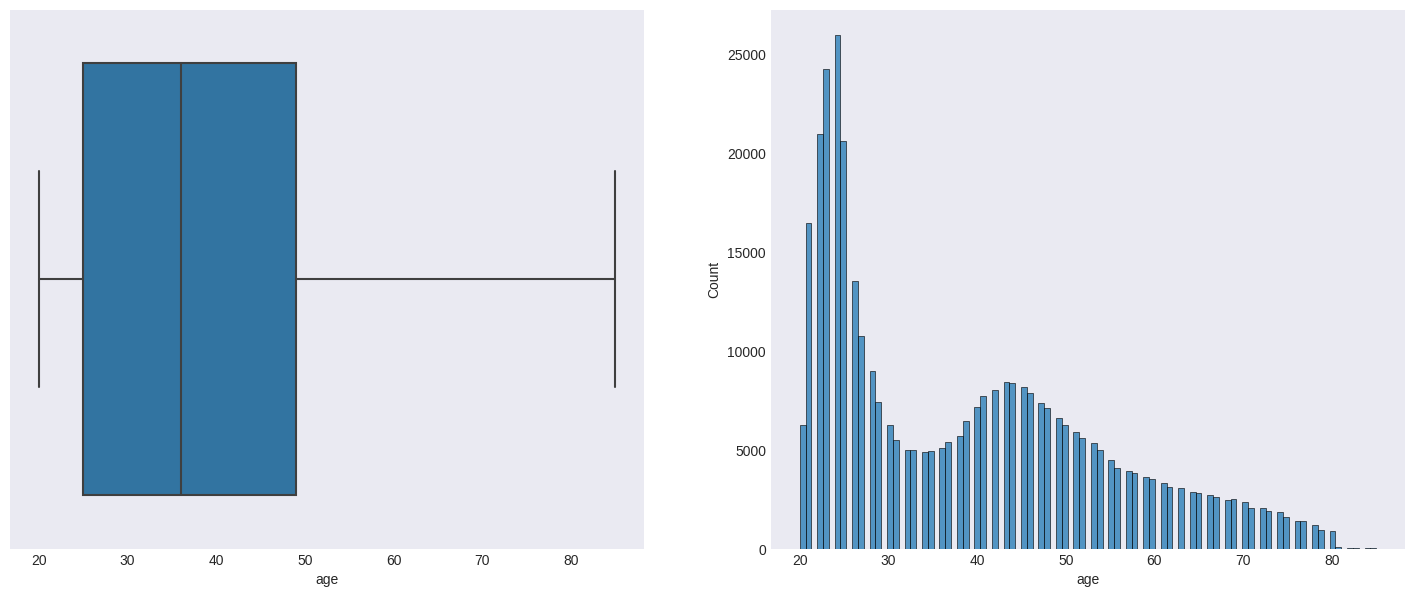

In [23]:
# 'age', 'annual_premium', 'vintage'
plt.figure(figsize=(18,7))

plt.subplot(1,2,1)
sns.boxplot(data=df1, x='age')

plt.subplot(1,2,2)
sns.histplot(data=df1, x='age');

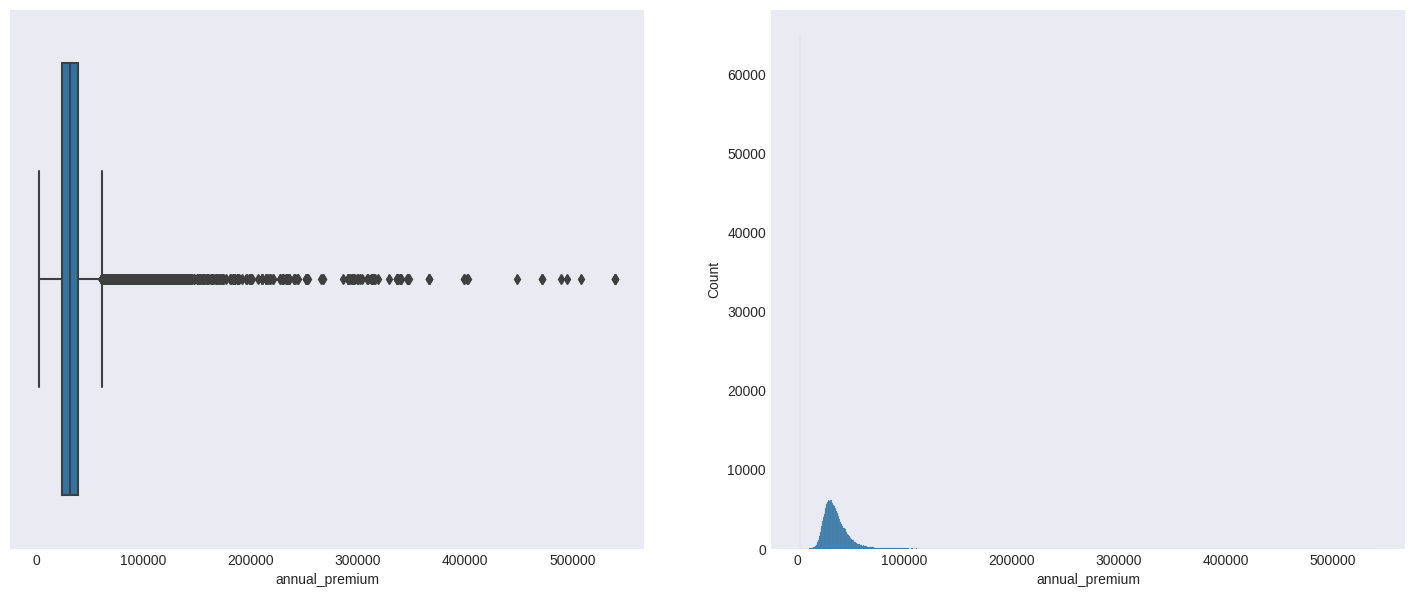

In [25]:
# 'age', 'annual_premium', 'vintage'
plt.figure(figsize=(18,7))

plt.subplot(1,2,1)
sns.boxplot(data=df1, x='annual_premium')

plt.subplot(1,2,2)
sns.histplot(data=df1, x='annual_premium');

**O que fazer como os outliers nesse caso?**

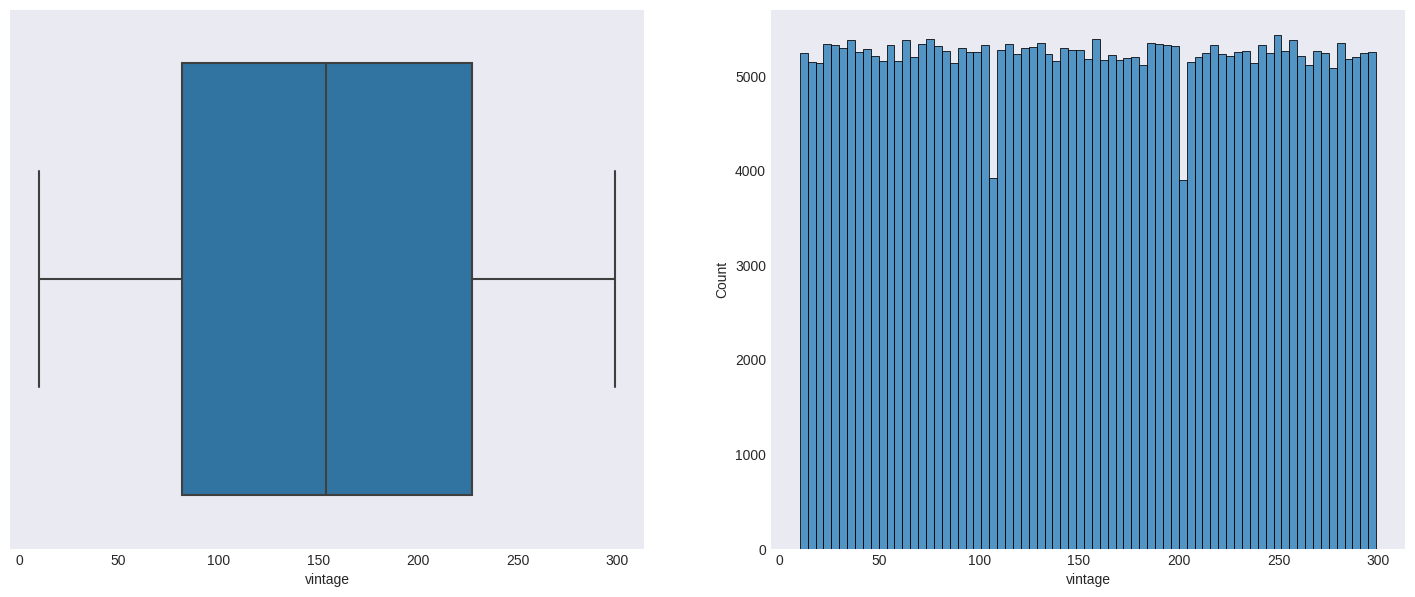

In [35]:
# 'age', 'annual_premium', 'vintage'
plt.figure(figsize=(18,7))

plt.subplot(1,2,1)
sns.boxplot(data=df1, x='vintage')

plt.subplot(1,2,2)
sns.histplot(data=df1, x='vintage');